In [30]:
import pandas as pd
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [31]:
df = pd.read_csv('parsed.csv')

df.columns  

Index(['date', 'hour', 'severity', 'type', 'address', 'injured_amount', 'dead',
       'accidents', 'year', 'month', 'day_of_week'],
      dtype='object')

In [32]:
df.head()

,date,hour,severity,type,address,injured_amount,dead,accidents,year,month,day_of_week
0,2018-01-01,01:30:00,Con heridos,Atropello,CL 87 9H 24,1,0,1,2018,January,Mon
1,2018-01-01,14:00:00,Solo daños,Choque,CL 110 CR 46,0,0,1,2018,January,Mon
2,2018-01-01,04:00:00,Solo daños,Choque,AV CIRCUNVALAR CR 9G,0,0,1,2018,January,Mon
3,2018-01-01,04:30:00,Solo daños,Choque,CLLE 72 CRA 29,0,0,1,2018,January,Mon
4,2018-01-01,17:20:00,Solo daños,Choque,VIA 40 CALLE 75,0,0,1,2018,January,Mon


In [33]:
df.describe()

,injured_amount,dead,accidents,year
count,25610.000000,25610.000000,25610.000000,25610.000000
mean,0.573721,0.010191,1.000195,2020.100547
std,1.018232,0.103878,0.013972,1.713887
min,0.000000,0.000000,1.000000,2018.000000
25%,0.000000,0.000000,1.000000,2019.000000
50%,0.000000,0.000000,1.000000,2020.000000
75%,1.000000,0.000000,1.000000,2021.000000
max,42.000000,2.000000,2.000000,2024.000000


Explore columns types

In [34]:
df.dtypes

date              object
hour              object
severity          object
type              object
address           object
injured_amount     int64
dead               int64
accidents          int64
year               int64
month             object
day_of_week       object
dtype: object

Extract categorical values

In [35]:
unique_severity = df['severity'].unique()

unique_type = df['type'].unique()

unique_month = df['month'].unique()

unique_day_of_week = df['day_of_week'].unique()

In [37]:
df['severity'] = pd.Categorical(df['severity'], categories=unique_severity)
df['type'] = pd.Categorical(df['type'], categories=unique_type)

# Convert 'month' and 'day_of_week' to categorical types
df['month'] = pd.Categorical(df['month'], unique_month)
df['day_of_week'] = pd.Categorical(df['day_of_week'], unique_day_of_week)

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Convert 'hour' to a time format
df['hour'] = pd.to_datetime(df['hour']).dt.time

# Convert 'address' to string
df['address'] = df['address'].astype(str)

# Convert 'injured_amount', 'dead', 'accidents', 'year' to int64 (handling NaN)
df['injured_amount'] = df['injured_amount'].fillna(0).astype(int)
df['dead'] = df['dead'].fillna(0).astype(int)
df['accidents'] = df['accidents'].astype(int)
df['year'] = df['year'].astype(int)


# Check the updated DataFrame types
print(df.dtypes)

# Optionally, view the updated DataFrame
print(df)

date              datetime64[ns]
hour                      object
severity                category
type                    category
address                   object
injured_amount             int64
dead                       int64
accidents                  int64
year                       int64
month                   category
day_of_week             category
dtype: object
            date      hour     severity       type  \
0     2018-01-01  01:30:00  Con heridos  Atropello   
1     2018-01-01  14:00:00   Solo daños     Choque   
2     2018-01-01  04:00:00   Solo daños     Choque   
3     2018-01-01  04:30:00   Solo daños     Choque   
4     2018-01-01  17:20:00   Solo daños     Choque   
...          ...       ...          ...        ...   
25605 2024-06-29  10:15:00  Con heridos     Choque   
25606 2024-06-30  02:00:00  Con heridos     Choque   
25607 2024-06-30  14:00:00  Con heridos     Choque   
25608 2024-06-30  17:00:00  Con muertos     Choque   
25609 2024-06-30  18:30:00  C

C:\Users\villa\AppData\Local\Temp\ipykernel_14312\3830812923.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['hour']).dt.time


Data exploration

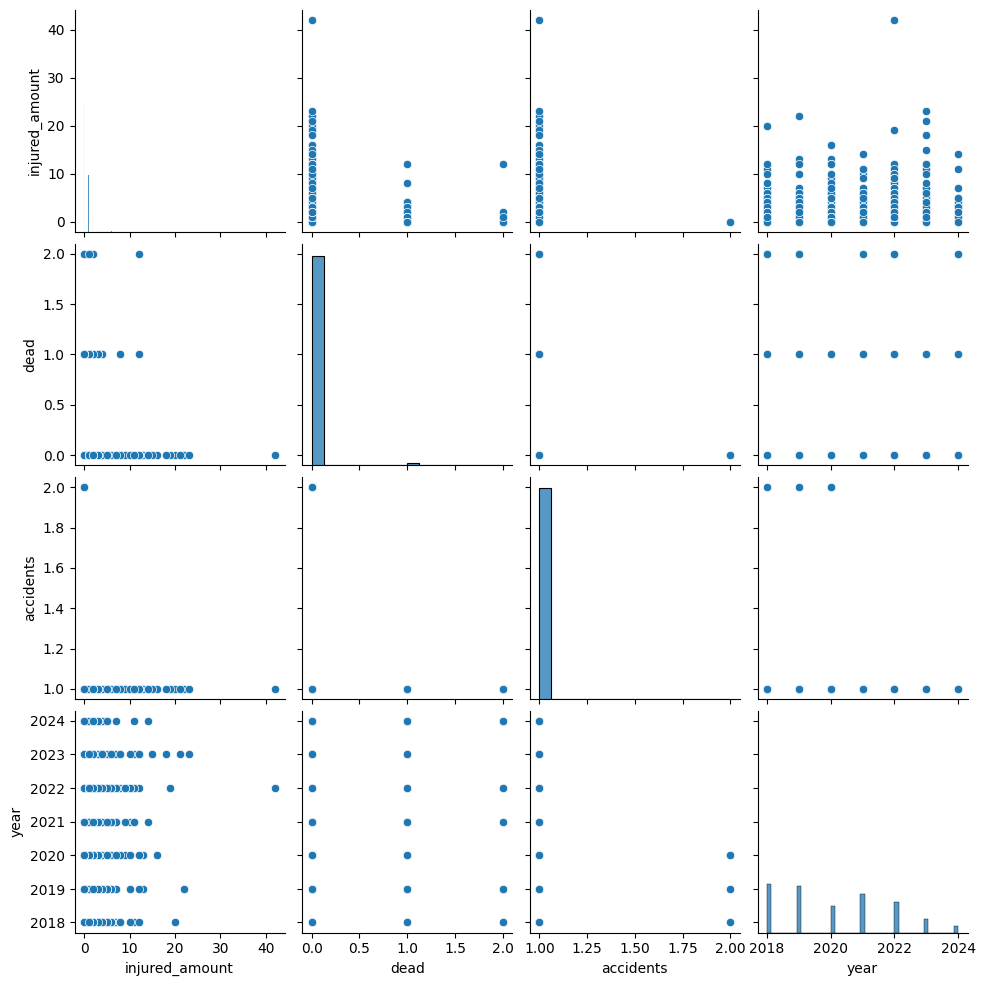

In [38]:
sns.pairplot(df)

date                object
hour                object
severity          category
type              category
address             object
injured_amount     float64
dead               float64
accidents            int64
year                 int64
month               object
day_of_week         object
dtype: object

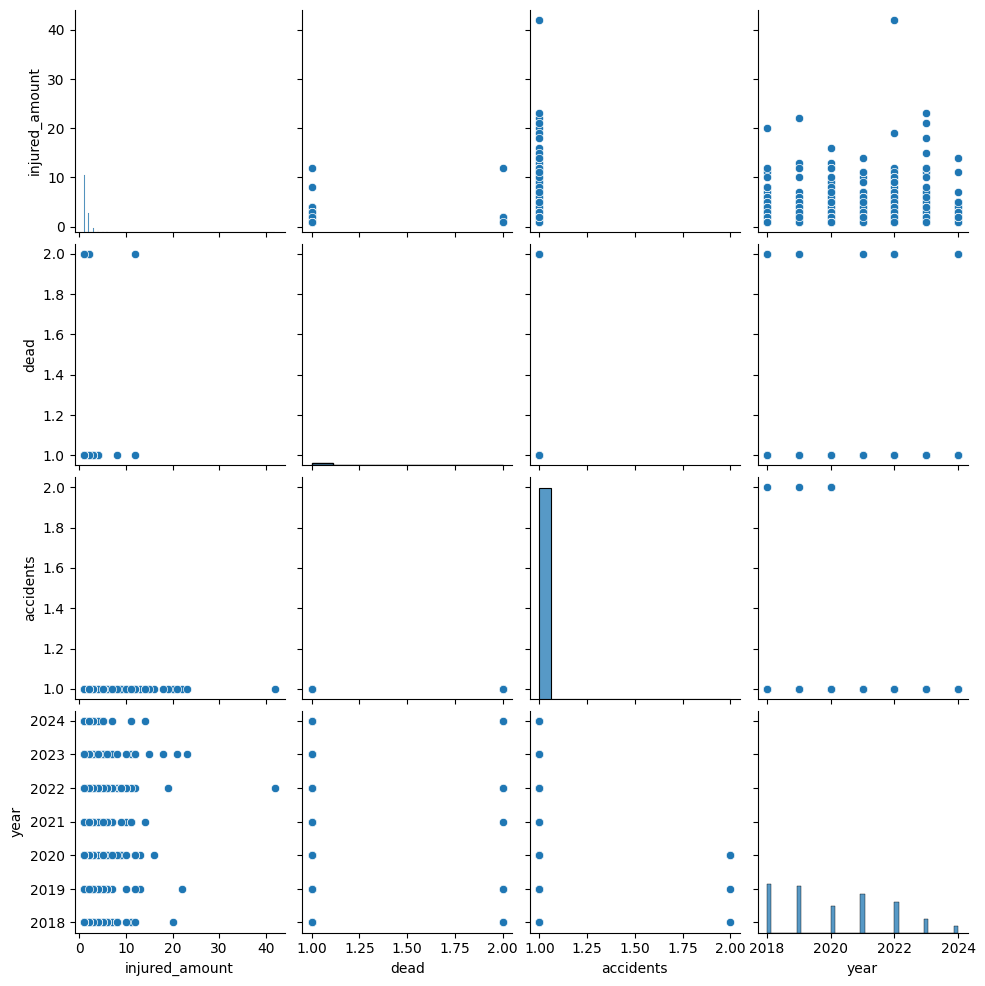

In [14]:
# Create a geolocator object
geolocator = Nominatim(user_agent="baqapp")

# Rate limiter to avoid hitting API limits
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Sample DataFrame

df = df.head(10)

# Function to get latitude and longitude
def get_lat_lon(address):
    try:
        location = geocode(address + ", Barranquilla, Colombia")
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error: {e}")
        return None, None

# Apply the function to the DataFrame
df[['latitude', 'longitude']] = df['address'].apply(lambda x: pd.Series(get_lat_lon(x)))

# Display the DataFrame
print(df)

                      date         hour     severity       type  \
0  2018-01-01T00:00:00.000  01:30:00:am  Con heridos  Atropello   
1  2018-01-01T00:00:00.000  02:00:00:pm   Solo daños     Choque   
2  2018-01-01T00:00:00.000  04:00:00:am   Solo daños     Choque   
3  2018-01-01T00:00:00.000  04:30:00:am   Solo daños     Choque   
4  2018-01-01T00:00:00.000  05:20:00:pm   Solo daños     Choque   
5  2018-01-01T00:00:00.000  06:00:00:pm  Con heridos     Choque   
6  2018-01-01T00:00:00.000  12:50:00:am  Con heridos  Atropello   
7  2018-01-02T00:00:00.000  02:30:00:pm   Solo daños     Choque   
8  2018-01-02T00:00:00.000  03:00:00:pm   Solo daños     Choque   
9  2018-01-02T00:00:00.000  03:45:00:pm   Solo daños     Choque   

                address  injured_amount  dead  accidents  year    month  \
0           CL 87 9H 24             1.0   NaN          1  2018  January   
1          CL 110 CR 46             NaN   NaN          1  2018  January   
2  AV CIRCUNVALAR CR 9G             N

C:\Users\villa\AppData\Local\Temp\ipykernel_14312\2068158256.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['latitude', 'longitude']] = df['address'].apply(lambda x: pd.Series(get_lat_lon(x)))
C:\Users\villa\AppData\Local\Temp\ipykernel_14312\2068158256.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['latitude', 'longitude']] = df['address'].apply(lambda x: pd.Series(get_lat_lon(x)))


In [15]:
df.to_csv('accidents_with_lat_lon.csv', index=False)